In [1]:
import pandas as pd
import numpy as np
import random
import math
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
dmahasiswa = pd.read_excel('Dataset/mahasiswa.xlsx')
dasrama    = pd.read_excel('Dataset/asrama.xlsx')

# == Preprocessing Dataset ==

## A. Persiapan Data Mahasiwa

### 1. Memberikan id untuk setiap mahasiswa dan melakukan transformasi data

In [3]:
dmahasiswa

,NIM,Nama,Jenis Kelamin,Program Studi,Status Akhir,Angkatan
0,11S17055,Ishak Jefferson Panjaitan,L,S1 Informatika,Aktif,2017
1,11S17065,Grace Margaret Sihite,P,S1 Informatika,Aktif,2017
2,12S17050,Kotrel Manurung,L,S1 Sistem Informasi,Aktif,2017
3,14S17008,Pranata Mangaleang Panjaitan,L,S1 Teknik Elektro,Aktif,2017
4,14S17032,Ronaldo Immanuel Parningotan,L,S1 Teknik Elektro,Aktif,2017
...,...,...,...,...,...,...
1521,31S22024,Ketty Yohana Tambunan,P,S1 Teknik Bioproses,Aktif,2022
1522,31S22025,Elisa Patricia Tambunan,P,S1 Teknik Bioproses,Aktif,2022
1523,31S22026,Stefhani Kezia,P,S1 Teknik Bioproses,Aktif,2022
1524,31S22027,Theresia Margaretha Simanullang,P,S1 Teknik Bioproses,Aktif,2022


In [4]:
def preprocessing_data_mahasiswa(data_mahasiswa):
    # membuat sebuah kolom baru dengan nama "unique_id" yang berisi id mahasiswa global
    data_mahasiswa['id_mahasiswa'] = data_mahasiswa.index
    data_mahasiswa['id_mahasiswa'] = data_mahasiswa['id_mahasiswa'].apply(lambda x: "idM_" + str(x))
    
    # mengubah nama kolom dan melakukan transformasi data
    data_mahasiswa = data_mahasiswa.rename(columns = {'Program Studi' : 'Prodi'})
    data_mahasiswa = data_mahasiswa.rename(columns = {'Jenis Kelamin' : 'Gender'})

    prodi_map = {
        'S1 Informatika': 'if',
        'S1 Sistem Informasi': 'si',
        'S1 Manajemen Rekayasa': 'mr',
        'S1 Teknik Bioproses': 'bp',
        'S1 Teknik Elektro': 'te',
        'DIV Teknologi Rekayasa Perangkat Lunak': 'trpl',
        'DIII Teknologi Informasi': 'ti',
        'DIII Teknologi Komputer': 'tk'
    }
    data_mahasiswa['Prodi'] = data_mahasiswa['Prodi'].map(prodi_map)

    angkatan_map = {
        2017 : 17,
        2018 : 18,
        2019 : 19,
        2020 : 20,
        2021 : 21, 
        2022 : 22
    }
    data_mahasiswa['Angkatan'] = data_mahasiswa['Angkatan'].map(angkatan_map)

    gender_map = {
        'L' : 'aspa',
        'P' : 'aspi'
    }
    data_mahasiswa['Gender'] = data_mahasiswa['Gender'].map(gender_map)
    
    prodi = list(set((data_mahasiswa['Prodi'])))
    angkatan = list(set((data_mahasiswa['Angkatan'])))
    gender = list(set((data_mahasiswa['Gender'])))
    
    return data_mahasiswa

In [5]:
data_m = preprocessing_data_mahasiswa(dmahasiswa)

### 2. Membuat list yang membagi data mahasiswa berdasarkan prodi, angkatan dan gender

In [6]:
def bagi_mahasiswa(data_mahasiswa):
    # mendaftarkan prodi, angkatan dan gender unik di dalam data mahasiswa
    prodi = list(set((data_mahasiswa['Prodi'])))
    angkatan = list(set((data_mahasiswa['Angkatan'])))
    gender = list(set((data_mahasiswa['Gender'])))
    
    mahasiswa_it_del = {}
    
    # pembentukan list baru yang akan membagi mahasiswa berdasarkan prodi, angkatan dan jenis kelamin
    for p in prodi:
        for a in angkatan:
            for g in gender:
                mahasiswa_it_del[f'{g}_{p}_{a}'] = data_mahasiswa[(data_mahasiswa['Prodi'] == p) & 
                                                             (data_mahasiswa['Angkatan'] == a) & 
                                                             (data_mahasiswa['Gender'] == g)]
                
    # melakukan pengecekan dan penghapusan list prodi yang kosong            
    empty_dictionary = []
    for mahasiswa in mahasiswa_it_del:
        jumlah = len(mahasiswa_it_del[mahasiswa])
        if jumlah == 0 :
            empty_dictionary.append(mahasiswa)

    for mahasiswa in empty_dictionary:
        del mahasiswa_it_del[mahasiswa]
                
    return mahasiswa_it_del

## B. Persiapan data asrama

In [9]:
dasrama

,Nama Asrama,Jumlah Mahasiswa per Kamar,Jumlah Lantai,Lantai 1,Lantai 2,Lantai 3,Lantai 4,Jumlah Kamar,Kapasitas Mahasiswa,Yang Menempati
0,Asrama Basket,4,3,12,32,16,0,60,240,L
1,Asrama Danau Toba,4,2,8,8,0,0,16,64,L
2,Asrama Kembar 1,6,2,7,16,0,0,23,138,P
3,Asrama Kembar 2,6,2,7,16,0,0,23,138,P
4,Rusun 1,8,2,10,10,0,0,20,160,L
5,Rusun 2,6,4,12,12,12,12,48,288,P
6,Rusun 3,6,4,18,20,0,20,58,348,L
7,Rusun 4,6,3,13,15,15,0,43,258,P


In [7]:
def preprocessing_data_asrama(data_asrama):
    # mengubah nama kolom dan melakukan transformasi data
    data_asrama = data_asrama.rename(columns = {'Nama Asrama' : 'asrama'})
    data_asrama = data_asrama.rename(columns = {'Jumlah Mahasiswa per Kamar' : 'perkamar'})
    data_asrama = data_asrama.rename(columns = {'Jumlah Lantai' : 'lantai'})
    data_asrama = data_asrama.rename(columns = {'Lantai 1' : 'l1'})
    data_asrama = data_asrama.rename(columns = {'Lantai 2' : 'l2'})
    data_asrama = data_asrama.rename(columns = {'Lantai 3' : 'l3'})
    data_asrama = data_asrama.rename(columns = {'Lantai 4' : 'l4'})
    data_asrama = data_asrama.rename(columns = {'Jumlah Kamar' : 'kamar'})
    data_asrama = data_asrama.rename(columns = {'Kapasitas Mahasiswa' : 'kapasitas'})
    data_asrama = data_asrama.rename(columns = {'Yang Menempati' : 'menempati'})

    asrama_map = {
        'Asrama Basket': 'pniel',
        'Asrama Danau Toba': 'antiokia',
        'Asrama Kembar 1': 'kapernaum',
        'Asrama Kembar 2': 'silo',
        'Rusun 1': 'mambre',
        'Rusun 2': 'mahanaim',
        'Rusun 3': 'nazareth',
        'Rusun 4': 'kana'
    }

    menempati_map = {
        'L': 'aspa',
        'P': 'aspi'
    }

    data_asrama['asrama'] = data_asrama['asrama'].map(asrama_map)
    data_asrama['menempati'] = data_asrama['menempati'].map(menempati_map)
    
    # membuat kolom baru untuk meyimpan data dari kolom l1, l2, l3 dan l4, serta menghapus kolom l1, l2, l3 dan l4
    data_asrama['l1'] = data_asrama['l1'].astype(str)
    data_asrama['l2'] = data_asrama['l2'].astype(str)
    data_asrama['l3'] = data_asrama['l3'].astype(str)
    data_asrama['l4'] = data_asrama['l4'].astype(str)

    data_asrama['kamar_per_lantai'] = data_asrama.apply(lambda x: [int(x['l1']), int(x['l2']), int(x['l3']), int(x['l4'])], axis=1)
    data_asrama = data_asrama.drop(columns=['l1', 'l2', 'l3', 'l4'])
    
    return data_asrama

In [8]:
data_m = preprocessing_data_asrama(dasrama)

# == PSO ==

### 1. Pembentukan struktur partikel

In [11]:
def inisialisasi_populasi_partikel(jumlah_partikel):
    populasi_partikel = []
    for n in range(jumlah_partikel):
        partikel = {
            'id_partikel': n + 1,
            'id_asrama' : 0,
            'id_mahasiswa': n + 1,
            'posisi_kamar': 0,
            'posisi_slot': 0,
            'kecepatan_kamar': 0,
            'kecepatan_slot': 0,
            'nilai_local_best': 0,
            'local_best_value' : [],
            'nilai_global_best': 0, 
            'global_best_value': [],
            'nilai_fitness': 0,
            'pelanggaran': [],
            'nilai_pelanggaran' : 0
        }
        populasi_partikel.append(partikel)
    
    return populasi_partikel

### 2. Inisialisasi posisi, kecepatan dan lokal best awal

In [12]:
# fungsi untuk inisialisasi posisi dan kecepatan awal partikel:
def give_value(populasi_partikel, data_asrama, id_asrama):
    jumlah_perkamar = data_asrama['perkamar'][id_asrama]
    jumlah_kamar = data_asrama['kamar'][id_asrama]

    slot_terisi = [] # digunakan untuk mendaftarkan slot kamar yang telah terisi
    
    for partikel in populasi_partikel:
        # memberikan value untuk id_asrama
        partikel['id_asrama'] = id_asrama
        
        while True:
            # memberikan value untuk posisi dan kecepatan awal kamar
            partikel['posisi_kamar'] = partikel['kecepatan_kamar'] = round(random.uniform(1, jumlah_kamar + 0.5), 2)
            # memberikan value untuk posisi dan kecepatan awal slot kamar
            partikel['posisi_slot'] = partikel['kecepatan_slot'] = round(random.uniform(1, jumlah_perkamar + 0.5), 2)
            
            temp_slot = [math.floor(partikel['posisi_kamar']), math.floor(partikel['posisi_slot'])]
            
            # mengecek apakah slot sudah terisi, jika belum maka dilanjutkan pemberian nilai awal ke partikel selanjutnya
            if temp_slot not in slot_terisi:
                slot_terisi.append(temp_slot)
                break
    
    return populasi_partikel

### 3. Sorting hasil penentuan nilai awal

In [13]:
def sort_populasi(populasi_partikel, data_asrama, indeks_asrama):
    jumlah_kamar = data_asrama['kamar'][indeks_asrama]

    # data = []
    list_perkamar = []

    # # mengurutkan partikel berdasarkan hasil pembagian slot kamar 
    # for partikel in populasi_partikel:
    #     data.append([math.floor(partikel['posisi_kamar']), math.floor(partikel['posisi_slot'])])
    
    # melist id mahasiswa berdasarkan hasil pembagian slot kamar
    for k in range(jumlah_kamar + 1):
        temp = []
        for partikel in populasi_partikel:
            if k == math.floor(partikel['posisi_kamar']):
                temp.append(partikel['id_mahasiswa']) # melist id mahasiswa perkamar
        list_perkamar.append(temp) # melist seluruh kelompok id mahasiswa perkamar di dalam satu asrama
            
    return list_perkamar

### 4. Evaluasi nilai fitness

#### 4.1 Menghitung nilai fitness

In [14]:
def evaluate_fitness(populasi_partikel, data_asrama, indeks_asrama, data_mahasiswa):
    jumlah_perkamar = data_asrama['perkamar'][indeks_asrama]
    jumlah_kamar = data_asrama['kamar'][indeks_asrama]
    for indeks_partikel, partikel in enumerate(populasi_partikel):
        partikel['nilai_fitness'] = 0
        partikel['pelanggaran'] = []
        partikel['nilai_pelanggaran'] = 0
        nilai_pelanggaran = 0
        asrama_maba = ['pniel', 'silo', 'kapernaum']
        asrama_ta = ['nazareth', 'kana']
        
        temp_slot = [math.floor(partikel['posisi_kamar']), math.floor(partikel['posisi_slot'])]
        
        # melakukan sorting untuk melihat pembagian mahasiswa perkamar
        sorted_data = sort_populasi(populasi_partikel, data_asrama, indeks_asrama)
        
        # mengecek apakah slot kamar digunakan oleh lebih dari satu mahasiswa (C1) nilai pelanggaran = 1
        # cara menghitungnya adalah dengan mengecek apakah slot sudah digunakan lebih dari sekali
        for i, p in enumerate(populasi_partikel):
            if indeks_partikel != i:
                if temp_slot == [math.floor(p['posisi_kamar']), math.floor(p['posisi_slot'])]:
                    if 'C1' not in partikel['pelanggaran']:
                        partikel['nilai_pelanggaran'] += 1
                        partikel['pelanggaran'].append('C1')
                        
        # mengecek apakah mahasiswa tingkat akhir berada pada asrama yang tepat (C2) nilai pelanggaran = 1
        for mahasiswa in data_mahasiswa:
            if mahasiswa['local_unique_id'] == partikel['id_mahasiswa']:
                if mahasiswa['Angkatan'] in [17, 18, 19] or (mahasiswa['Angkatan'] in [20] and mahasiswa['Prodi'] in ['tk', 'ti']):
                        if data_asrama['asrama'][indeks_asrama] not in asrama_ta:
                            if 'C2' not in partikel['pelanggaran']:
                                partikel['nilai_pelanggaran'] += 1
                                partikel['pelanggaran'].append('C2')
                                
        # mengecek apakah mahasiswa baru berada pada asrama yang tepat (C5)
        for mahasiswa in data_mahasiswa:
            if mahasiswa['Angkatan'] in [22]:
                if data_asrama['asrama'][indeks_asrama] not in asrama_maba:
                    if 'C5' not in partikel['pelanggaran']:
                        nilai_pelanggaran += 1
                        partikel['pelanggaran'].append('C5')
                                
    # mengecek apakah mahasiswa laki-laki berada pada asrama laki-laki dan mahasiswa perempuan menempati asrama perempuan (C3)
    ### tidak di terapkan karena mahasiswa sudah di tentukan terebih dahulu asramanya

    # mengecek apakah terdapat tiga program studi di dalam satu kamar (C4)
    for kelompok_mahasiswa in sorted_data:
        prodi = []
        for id_mahasiswa in kelompok_mahasiswa:
            for mahasiswa in data_mahasiswa:
                if id_mahasiswa == mahasiswa['local_unique_id']:
                    prodi.append(mahasiswa['Prodi'])
        
        jumlah_prodi = len(list(set(prodi)))
        if jumlah_prodi < 3: 
            for partikel in populasi_partikel:
                if partikel['id_mahasiswa'] in kelompok_mahasiswa:
                    if 'C4' not in partikel['pelanggaran']:
                        partikel['nilai_pelanggaran'] += 1
                        partikel['pelanggaran'].append('C4')
                        
        # mengecek apakah jumlah mahasiswa pada satu kamar sejumlah dengan kapasitas kamar (c1)                
        count_perkamar = 0
        for id_mahasiswa in kelompok_mahasiswa:
            count_perkamar += 1
                
        if count_perkamar != jumlah_perkamar:
            for partikel in populasi_partikel:
                if partikel['id_mahasiswa'] in kelompok_mahasiswa:
                    if 'c1' not in partikel['pelanggaran']:
                        partikel['nilai_pelanggaran'] += 0.5
                        partikel['pelanggaran'].append('c1')
    
        # mengecek apakah pada masing-masing kamar setiap program studi terdiri dari dua orang mahasiswa (c2)
        if jumlah_perkamar >= 6:     
            prodi_counter = Counter(prodi)
            for count in prodi_counter.values():
                if count != 2:
                    for partikel in populasi_partikel:
                        if partikel['id_mahasiswa'] in kelompok_mahasiswa:
                            if 'c2' not in partikel['pelanggaran']:
                                partikel['nilai_pelanggaran'] += 0.5
                                partikel['pelanggaran'].append('c2')
                                
    # menghitung nilai fitness
    for partikel in populasi_partikel:
        partikel['nilai_fitness'] = round(1 / (1 + partikel['nilai_pelanggaran']), 2)
#         if partikel['id_partikel'] == 1:
#             print(partikel['nilai_fitness'])
        
    return populasi_partikel

#### 4.2. Melakukan seleksi nilai fitness partikel

In [15]:
# fungsi untuk menyeleksi partikel yang akan melakukan update posisi dan kecepatan
def seleksi_partikel(populasi_partikel):
    partikel_bagus = []
    for partikel in populasi_partikel:
        if partikel['nilai_fitness'] == 1 and partikel['id_partikel'] not in partikel_bagus:
            partikel_bagus.append(partikel['id_partikel'])
    return partikel_bagus

#### 4.3. Menyimpan solusi dan nilai fitness rata-rata

In [16]:
# menambahkan fungsi untuk menyimpan solusi dan nilai fitness rata-rata
def record_solution(populasi_partikel, sorted_data):
    jumlah_fitness = 0

    for partikel in populasi_partikel:
        jumlah_fitness += partikel['nilai_fitness']

    mean_fitness = jumlah_fitness / len(populasi_partikel)
    
    current_solusi = sorted_data
    
    return (mean_fitness, current_solusi)

### 5. Menentukan local dan global best

#### 5.1 Menentukan local best

In [17]:
# fungsi untuk menentukan nilai lokal best
def find_local_best(populasi_partikel):
    for partikel in populasi_partikel:
        temp_partikel = partikel['local_best_value'].copy()
        prev_loc_best = temp_partikel
        if partikel['local_best_value'] == [] or partikel['nilai_fitness'] > prev_loc_best['nilai_fitness']:
            partikel['nilai_local_best'] = partikel['nilai_fitness']
            partikel['local_best_value'] = {
                'id_partikel' : partikel['id_partikel'], 
                'posisi_kamar' : partikel['posisi_kamar'], 
                'posisi_slot' : partikel['posisi_slot'], 
                'nilai_fitness' : partikel['nilai_fitness']
            }
            
    return populasi_partikel

#### 5.2 Menentukan global best

In [18]:
def find_global_best(populasi_partikel):
    # mendaftarkan nilai fitness yang unik untuk penentuan global best
    daftar_fitness = []
    for partikel in populasi_partikel:
        if partikel['nilai_fitness'] not in daftar_fitness:
            daftar_fitness.append(partikel['nilai_fitness'])
    
    # menentukan nilai fitness terbaik
    top_fitness = 0
    for fitness_value in daftar_fitness:
        if top_fitness < fitness_value:
            temp_fitness = fitness_value
            top_fitness = temp_fitness
    
    # menyimpan setiap partikel dengan nilai fitness terbaik
    partikel_top = []
    for partikel in populasi_partikel:
        if partikel['nilai_fitness'] == top_fitness:
            partikel_top.append(partikel)
#     print("Jumlah fitness tertinggi:", len(partikel_top), "partikel")
    
    # menentukan global best value
    global_best_value = []
    temp_partikel = None
    for best_partikel in partikel_top:
        if temp_partikel is None or best_partikel['id_partikel'] > temp_partikel['id_partikel']:
            temp_partikel = best_partikel
            global_best_value = temp_partikel

    for partikel in populasi_partikel:
        temp_global_best = partikel['global_best_value']
        prev_global_best = temp_global_best
        if partikel['nilai_global_best'] == 0 or partikel['nilai_fitness'] > prev_global_best['nilai_fitness']:
#             partikel['global_best_value'] = global_best_value.copy()
            partikel['global_best_value'] = {
                'id_partikel' : global_best_value['id_partikel'], 
                'posisi_kamar' : global_best_value['posisi_kamar'], 
                'posisi_slot' : global_best_value['posisi_slot'], 
                'nilai_fitness' : global_best_value['nilai_fitness']
            }
            partikel['nilai_global_best'] = global_best_value['nilai_fitness']

    return populasi_partikel

In [19]:
# populasi_partikel = inisialisasi_populasi_partikel(190)

# for partikel in populasi_partikel:
#     if partikel['id_partikel'] == 1:
#         print("inisialisasi\n", partikel)
        
# populasi_partikel = give_value(populasi_partikel, data_a, 0)

# for partikel in populasi_partikel:
#     if partikel['id_partikel'] == 1:
#         print("value\n", partikel)
        
# populasi_partikel = evaluate_fitness(populasi_partikel, data_a, 0, mahasiswa_['pniel'])

# for partikel in populasi_partikel:
#     if partikel['id_partikel'] == 1:
#         print("fitness\n", partikel)
        
# populasi_partikel = give_reference(populasi_partikel)

# for partikel in populasi_partikel:
#     if partikel['id_partikel'] == 1:
#         print("lokal\n", partikel)
        
# populasi_paritikel = find_global_best(populasi_partikel)

# for partikel in populasi_partikel:
#     if partikel['id_partikel'] == 1:
#         print("global\n", partikel)



### 6. Update posisi, kecepatan, nilai pelanggaran dan kode pelanggaran pada partikel

In [56]:
def update(populasi_partikel, data_asrama, indeks_asrama, batas_atas_kamar):
    # daftar_id => digunakan untuk mendaftarkan id partikel yang akan diupdate, partikel_bagus.append(seleksi_partikel(populasi_paritikel))
    # batas_atas_kamar => digunakan untuk menentukan batas atas pada satu iterasi, kamar_kosong

    # untuk proses update batas atas kamar
    jumlah_kamar = batas_atas_kamar
    jumlah_slot = data_asrama['perkamar'][indeks_asrama] # batas atas slot kamar
    print("batas atas kamar pada fungsi update:", jumlah_kamar)
    
    w = 0.5 # untuk mengatur cepat perubahan data
    c1 = 1 # untuk mengatur besarnya pengaruh lokal best dalam perubahan data
    c2 = 0.8 # untuk mengatur besarnya pengaruh global best dalam perubahan data

    list_posisi = []

    # update posisi dan kecepatan partikel
    for partikel in populasi_partikel:
        local_best = partikel['local_best_value'].copy()
        global_best = partikel['global_best_value'].copy()
        iterasi = 0
        
        while True:
            iterasi += 1
            # update kecepatan dan posisi kamar
            update_kecepatan_kamar = (
                    (w * partikel['kecepatan_kamar']) + 
                    (c1 * random.uniform(0, (local_best['posisi_kamar'] - partikel['posisi_kamar']))) +
                    (c2 * random.uniform(0, (global_best['posisi_kamar'] - partikel['posisi_kamar'])))
            )

            update_posisi_kamar = partikel['posisi_kamar'] + update_kecepatan_kamar

            if update_posisi_kamar > jumlah_kamar + 0.9:
                selisih_posisi_kamar = update_posisi_kamar - jumlah_kamar
                if math.floor(selisih_posisi_kamar) < 1:
                    update_posisi_kamar = selisih_posisi_kamar + 1
                else:
                    update_posisi_kamar = selisih_posisi_kamar
            elif update_posisi_kamar < 1:
                selisih_posisi_kamar = update_posisi_kamar + jumlah_kamar
                update_posisi_kamar = selisih_posisi_kamar                

            partikel['kecepatan_kamar'] = round(update_kecepatan_kamar, 2)
            partikel['posisi_kamar'] = round(update_posisi_kamar, 2)

            posisi_kamar = math.floor(partikel['posisi_kamar'])

            # update kecepatan dan posisi slot
            update_kecepatan_slot = (
                    (w * partikel['kecepatan_slot']) + 
                    (c1 * random.uniform(0, (local_best['posisi_slot'] - partikel['posisi_slot']))) +
                    (c2 * random.uniform(0, (global_best['posisi_slot'] - partikel['posisi_slot'])))
            )

            update_posisi_slot = partikel['posisi_slot'] + update_kecepatan_slot

            if update_posisi_slot > jumlah_slot + 0.9:
                selisih_posisi_slot = update_posisi_slot - jumlah_slot
                if math.floor(selisih_posisi_slot) < 1:
                    update_posisi_slot = selisih_posisi_slot + 1
                else:
                    update_posisi_slot = selisih_posisi_slot
            elif update_posisi_slot < 1:
                selisih_posisi_slot = update_posisi_slot + jumlah_slot
                update_posisi_slot = selisih_posisi_slot

            partikel['kecepatan_slot'] = round(update_kecepatan_slot, 2)
            partikel['posisi_slot'] = round(update_posisi_slot, 2)

            posisi_slot = math.floor(partikel['posisi_slot'])
            
            # mengecek apakah slot sudah digunakan
            if [posisi_kamar, posisi_slot] not in list_posisi or iterasi == 10:
                list_posisi.append([posisi_kamar, posisi_slot])
                break

    return (populasi_partikel)
    

# == Optimasi Denah Kamar Menggunakan PSO ==

## Preprocessing Dataset Mahasiswa dan Asrama

In [21]:
# preprocessing data mahasiswa
data_m = preprocessing_data_mahasiswa(dmahasiswa)
# print(data_m)

# membagi data mahasiswa berdasarkan jenis kelamin, program studi dan angkatan
mahasiswa_it_del = bagi_mahasiswa(data_m)
# print(mahasiswa_it_del.keys())

# melakukan pemisahan keys mahasiswa berdasarkan jenis kelamin
mahasiswa_aspa = []
mahasiswa_aspi = []
for mahasiswa in mahasiswa_it_del:
    gender = list(set((mahasiswa_it_del[mahasiswa]['Gender'])))
    for g in gender:
        if g == 'aspa':
            mahasiswa_aspa.append(mahasiswa)
        else:
            mahasiswa_aspi.append(mahasiswa)
            
# print("Mahasiswa laki_laki keys:\n", mahasiswa_aspa)
# print("Mahasiswa perempuan keys:\n", mahasiswa_aspi)

In [22]:
# preprocessing data asrama
data_a = preprocessing_data_asrama(dasrama)
# print(data_a)

In [23]:
# membagi kelompok mahasiswa ke masing-masing asrama
aspa = mahasiswa_aspa.copy()
aspi = mahasiswa_aspi.copy()
asrama_ = {}
mahasiswa_ = {}
# jumlah_mahasiswa_ = {}
count = 0
for indeks, asrama in enumerate(data_a['asrama']):
    kapasitas = data_a['kapasitas'][indeks]
    menempati = data_a['menempati'][indeks]
    asrama_[f'{asrama}'] = []
    mahasiswa_[f'{asrama}'] = []
#     jumlah_mahasiswa_[f'{asrama}'] = []
    jumlah_mahasiswa = 0
    jumlah_prodi = 0
    total = 0
    n = 0
    
    # pembagian asrama laki-laki
    if asrama == 'pniel': # 22
        asrama_[asrama] = ['aspa_tk_22', 'aspa_if_22', 'aspa_si_22', 'aspa_trpl_22', 
                           'aspa_te_22', 'aspa_bp_22', 'aspa_ti_22', 'aspa_mr_22']
        for prodi in asrama_[asrama]:
            jumlah_mahasiswa += len(mahasiswa_it_del[prodi])
        print("pniel :", jumlah_mahasiswa)
#         jumlah_mahasiswa[asrama] = jumlah_mahasiswa
        
    elif asrama == 'nazareth': # 17, 18, 19 + 20, 21
        asrama_[asrama] = ['aspa_if_17', 'aspa_if_18', 'aspa_if_19', 'aspa_si_17', 
                           'aspa_si_18', 'aspa_si_19', 'aspa_trpl_19', 'aspa_te_17', 
                           'aspa_te_18', 'aspa_te_19',  'aspa_mr_19', 'aspa_si_20',
                           'aspa_te_20', 'aspa_tk_20',  'aspa_if_20', 'aspa_ti_20',
                          'aspa_mr_20', 'aspa_ti_21']
        for prodi in asrama_[asrama]:
            jumlah_mahasiswa += len(mahasiswa_it_del[prodi])
        print("nazareth :", jumlah_mahasiswa)
        
    elif asrama == 'antiokia': # 20
        asrama_[asrama] = ['aspa_bp_18', 'aspa_bp_19', 'aspa_bp_20', 'aspa_trpl_20']
        for prodi in asrama_[asrama]:
            jumlah_mahasiswa += len(mahasiswa_it_del[prodi])
        print("antiokia :", jumlah_mahasiswa)
        
    elif asrama == 'mambre': # 21
        asrama_[asrama] = ['aspa_si_21', 'aspa_trpl_21', 'aspa_bp_21', 'aspa_te_21', 
                           'aspa_tk_21', 'aspa_if_21', 'aspa_mr_21']
        for prodi in asrama_[asrama]:
            jumlah_mahasiswa += len(mahasiswa_it_del[prodi])
        print("mambre :", jumlah_mahasiswa)
    
    # pembagian asrama perempuan
    elif asrama == 'silo': # 22
        asrama_[asrama] = ['aspi_tk_22', 'aspi_bp_22','aspi_ti_22', 
                           'aspi_te_22', 'aspi_bp_18', 'aspi_if_22']
        for prodi in asrama_[asrama]:
            jumlah_mahasiswa += len(mahasiswa_it_del[prodi])
        print("silo :", jumlah_mahasiswa)
        
    elif asrama == 'kapernaum': #22
        asrama_[asrama] = ['aspi_si_22', 'aspi_trpl_22', 'aspi_bp_19', 'aspi_mr_22', 
                           'aspi_bp_20', 'aspi_bp_17']
        for prodi in asrama_[asrama]:
            jumlah_mahasiswa += len(mahasiswa_it_del[prodi])
        print("kepernaum :", jumlah_mahasiswa)
        
    elif asrama == 'mahanaim':
        asrama_[asrama] = ['aspi_bp_21', 'aspi_mr_21', 'aspi_if_21', 'aspi_te_21', 
                           'aspi_ti_21', 'aspi_tk_20', 'aspi_tk_21', 'aspi_si_20', 
                           'aspi_si_21', 'aspi_trpl_21', 'aspi_te_20']
        for prodi in asrama_[asrama]:
            jumlah_mahasiswa += len(mahasiswa_it_del[prodi])
        print("mahanaim :", jumlah_mahasiswa)
        
    elif asrama == 'kana': # 17, 18, 19 + 20, 21
        asrama_[asrama] = ['aspi_if_17', 'aspi_if_18', 'aspi_if_19', 'aspi_si_18', 
                           'aspi_si_19', 'aspi_trpl_18', 'aspi_trpl_19', 'aspi_te_17', 
                           'aspi_te_18', 'aspi_te_19', 'aspi_mr_19', 'aspi_mr_20',
                           'aspi_if_20', 'aspi_ti_20', 'aspi_trpl_20']
        for prodi in asrama_[asrama]:
            jumlah_mahasiswa += len(mahasiswa_it_del[prodi])
        print("kana :", jumlah_mahasiswa)

pniel : 190
antiokia : 54
kepernaum : 136
silo : 138
mambre : 153
mahanaim : 281
nazareth : 320
kana : 254


In [24]:
# # untuk melihat apakah ada prodi yang belum mendapatkan asrama
# for indeks, asrama in enumerate(data_a['asrama']):
#     menempati = data_a['menempati'][indeks]
#     for prodi in asrama_[asrama]:
#         if menempati == 'aspa':
#             mahasiswa_aspa.remove(prodi)
#         elif menempati == 'aspi':
#             mahasiswa_aspi.remove(prodi)

# print("aspa:", mahasiswa_aspa)
# print("\naspi:", mahasiswa_aspi)

In [25]:
# mengelompokkan dan memberikan id unik untuk masing-masing mahasiswa berdasarkan asrama
mahasiswa_ = {}
for i in range(len(data_a)):
    mahasiswa_[f"{data_a['asrama'][i]}"] = []
    
    n = 0
    for prodi in asrama_[data_a['asrama'][i]]:
        for indeks_mahasiswa, mahasiswa in mahasiswa_it_del[prodi].iterrows():
            n = n + 1
            mahasiswa['local_unique_id'] = n
            mahasiswa_[data_a['asrama'][i]].append(mahasiswa)

## Proses Optimasi

In [84]:
for i in range(len(data_a)):
    if data_a['asrama'][i] == 'pniel':
        print("Proses optimasi pada asrama:", data_a['asrama'][i])
        jumlah_slot = data_a['perkamar'][i]

        # inisialisasi populasi_partikel
        populasi_partikel = inisialisasi_populasi_partikel(len(mahasiswa_[data_a['asrama'][i]]))
        
        # memberikan nilai awal ke masing-masing partikel
        populasi_partikel = give_value(populasi_partikel, data_a, i)
        
        # mengurutkan partikel berdasarkan hasil pembagian slot kamar
        sorted_data = sort_populasi(populasi_partikel,data_a, i)

        # evaluasi nilai fitness
        populasi_partikel = evaluate_fitness(populasi_partikel, data_a, i, mahasiswa_[data_a['asrama'][i]])
        
        # update nilai lokal best
        populasi_partikel = find_local_best(populasi_partikel)

        # menentukan nilai global best
        populasi_partikel = find_global_best(populasi_partikel)

        # melakukan seleksi nilai fitness pastikel dengan nilai fitness = 1.0
        partikel_pilihan = seleksi_partikel(populasi_partikel)

        # menyimpan partikel dalam kelompok perkamar
        kelompok_bagus = []
        for kelompok_mahasiswa in sorted_data:
            partikel_tepat = 0
            for id_partikel in partikel_pilihan:
                if id_partikel in kelompok_mahasiswa:
                    partikel_tepat += 1
            if partikel_tepat == jumlah_slot:
                kelompok_bagus.append(kelompok_mahasiswa)

        # menentukan batas atas kamar untuk proses update posisi dan kecepatan partikel (fungsi update)
        batas_atas_kamar = data_a['kamar'][i] - len(kelompok_bagus)

        # menghapus partikel yang sudah memiliki nilai fitness 1.0 dari populasi_partikel
        hapus_partikel = populasi_partikel.copy()
        for partikel in populasi_partikel:
            if partikel['id_partikel'] in partikel_pilihan:
                hapus_partikel.remove(partikel) 

        populasi_partikel = hapus_partikel.copy()

        print("Hasil inisialisasi awal:")
        print("partikel bernilai fitness 1.0:", partikel_pilihan)
        print("total partikel", len(partikel_pilihan))
        print("kelompok perkamar:", kelompok_bagus)
        print("total kelompok", len(kelompok_bagus))

        simpan_kelompok_bagus = []
        simpan_partikel_pilihan = []

        simpan_kelompok_bagus = kelompok_bagus.copy()
        simpan_partikel_pilihan = partikel_pilihan.copy()
                
        iterasi = 10
        for n in range(iterasi):
            print("Hasil pada iterasi", n+1, ":")

            # update posisi dan kecepatan partikel
            populasi_partikel = update(populasi_partikel, data_a, i, batas_atas_kamar)

            # mengurutkan partikel berdasarkan hasil pembagian slot kamar
            sorted_data = sort_populasi(populasi_partikel, data_a, i)

            # melakukan seleksi nilai fitness partikel dengan nilai fitness = 1.0
            partikel_pilihan = seleksi_partikel(populasi_partikel)

            # menghapus partikel yang sudah memiliki nilai fitness 1.0 dari populasi_partikel
            hapus_partikel = populasi_partikel.copy()
            for partikel in populasi_partikel:
                if partikel['id_partikel'] in partikel_pilihan:
                    hapus_partikel.remove(partikel) 

            populasi_partikel = hapus_partikel.copy()

            # menyimpan partikel dalam kelompok perkamar
            kelompok_bagus = []
            for kelompok_mahasiswa in sorted_data:
                partikel_tepat = 0
                for id_partikel in partikel_pilihan:
                    if id_partikel in kelompok_mahasiswa:
                        partikel_tepat += 1
                if partikel_tepat == jumlah_slot:
                    kelompok_bagus.append(kelompok_mahasiswa)

            # menyimpan partikel pilihan
            for id_partikel in partikel_pilihan:
                if id_partikel not in simpan_partikel_pilihan:
                    simpan_partikel_pilihan.append(id_partikel)

            # menyimpan pembagian kelompok
            for kelompok in kelompok_bagus:
                if kelompok not in simpan_kelompok_bagus:
                    simpan_kelompok_bagus.append(kelompok)

            # menentukan batas atas kamar untuk iterasi selanjutnya
            if len(kelompok_bagus) != 0:
                batas_atas_kamar = data_a['kamar'][i] - len(kelompok_bagus)
            else:
                for kelompok in sorted_data:
                    count_id = 0
                    for id_partikel in kelompok:
                        count_id += 1
                    if count_id == jumlah_slot:
                        kelompok_bagus.append(kelompok)
                        for id_p in kelompok:
                            if id_p not in partikel_pilihan:
                                partikel_pilihan.append(id_partikel)

            # hapus partikel
            hapus_partikel = populasi_partikel.copy()
            for partikel in populasi_partikel:
                if partikel['id_partikel'] in partikel_pilihan:
                    hapus_partikel.remove(partikel) 

            populasi_partikel = hapus_partikel.copy()
            print("panjang partikel", len(populasi_partikel))

                
            batas_atas_kamar = batas_atas_kamar - len(kelompok_bagus)
            



Proses optimasi pada asrama: pniel
Hasil inisialisasi awal:
partikel bernilai fitness 1.0: [1, 3, 8, 9, 10, 11, 12, 15, 16, 18, 20, 22, 23, 25, 26, 29, 31, 35, 36, 37, 38, 39, 40, 41, 44, 47, 53, 55, 58, 59, 60, 71, 72, 77, 79, 80, 81, 83, 84, 86, 90, 91, 92, 93, 95, 97, 103, 109, 110, 113, 116, 117, 120, 125, 126, 129, 130, 131, 132, 133, 134, 136, 138, 139, 142, 143, 144, 145, 146, 153, 157, 163, 165, 166, 167, 168, 170, 174, 179, 183, 184, 185, 188, 189]
total partikel 84
kelompok perkamar: [[12, 80, 103, 126], [35, 36, 53, 146], [15, 92, 116, 163], [1, 37, 41, 86], [25, 58, 168, 179], [23, 39, 40, 95], [47, 129, 153, 167], [29, 170, 174, 188], [18, 20, 59, 72], [8, 90, 91, 143], [10, 55, 60, 81], [113, 138, 142, 166], [9, 26, 71, 77], [31, 125, 139, 185], [11, 79, 131, 157], [16, 38, 97, 109], [22, 93, 134, 184], [83, 84, 130, 183], [3, 117, 133, 144], [110, 136, 145, 189], [44, 120, 132, 165]]
total kelompok 21
Hasil pada iterasi 1 :
batas atas kamar pada fungsi update: 39
panjang

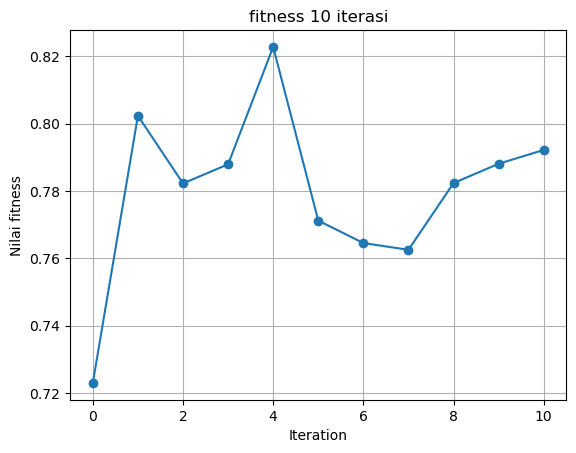

In [ ]:
# menampilkan perubahan nilai fitness rata-rata
# Buat nilai sumbu x (angka iterasi)
iterations = list(range(0, 11))  # 1 to 10

# Plot diagram garis
plt.plot(iterations, fitness_values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Nilai fitness')
plt.title('fitness 10 iterasi')
plt.grid(True)
plt.show()

In [87]:
for kelompok in simpan_kelompok_bagus:
    print(kelompok)

print(len(simpan_kelompok_bagus))

[12, 80, 103, 126]
[35, 36, 53, 146]
[15, 92, 116, 163]
[1, 37, 41, 86]
[25, 58, 168, 179]
[23, 39, 40, 95]
[47, 129, 153, 167]
[29, 170, 174, 188]
[18, 20, 59, 72]
[8, 90, 91, 143]
[10, 55, 60, 81]
[113, 138, 142, 166]
[9, 26, 71, 77]
[31, 125, 139, 185]
[11, 79, 131, 157]
[16, 38, 97, 109]
[22, 93, 134, 184]
[83, 84, 130, 183]
[3, 117, 133, 144]
[110, 136, 145, 189]
[44, 120, 132, 165]
21


In [52]:
for kombinasi in current_solution[1]:
    print(kombinasi)
print(len(current_solution[1]))

[]
[104, 121, 171]
[5, 6, 68]
[69, 162]
[64, 96, 98, 123]
[4, 137, 138]
[48, 61]
[55, 82, 124]
[17, 57, 115]
[42, 73, 161]
[33, 117, 127, 146]
[36, 99]
[91, 168]
[63, 122, 129]
[87, 100, 143, 150]
[102, 153, 172]
[39, 95, 148]
[9, 110, 174, 177]
[11, 15, 106, 182]
[29, 136, 142]
[41, 74, 97, 164]
[24, 79, 176]
[46, 66]
[8, 76, 169]
[67, 149, 155]
[109, 132, 185, 187]
[56, 133, 158, 190]
[1, 22, 45]
[19, 43, 178]
[62, 85, 101, 179]
[167, 181]
[60, 71, 89, 145]
[92, 103, 188, 189]
[25, 50, 135, 140]
[28, 54, 58]
[10, 31, 51, 90]
[16, 23, 53, 175]
[52, 75, 151]
[7, 37, 47, 163]
[70, 93, 184]
[107, 126, 160]
[38, 128, 139, 154]
[2, 88, 131]
[27, 40, 77, 114]
[125, 159]
[32, 113, 165]
[44, 94, 111, 144]
[30]
[18, 72, 141, 156]
[105, 112, 180]
[20, 147, 152]
[34, 118]
[12, 14, 78, 173]
[119, 120, 157]
[59, 80, 83, 130]
[13, 26, 108, 170]
[3, 21, 166]
[116]
[35, 81]
[49, 84, 86, 134]
[65, 183, 186]
61
61


In [ ]:
n = 0
print("Hasil dari pembagian denah kamar terbaik dalam 10 iterasi")
print("Nilai fitness", best_mean)
print("Penentuan id perkamar:")
for kombinasi in best_plan:
    print(kombinasi)
#     for a in kombinasi:
#         n += 1
# print(n)

Hasil dari pembagian denah kamar terbaik dalam 10 iterasi
Nilai fitness 0.8228421052631585
Penentuan id perkamar:
[]
[76, 97, 111]
[38, 90, 183]
[55, 165]
[24, 81]
[14, 141]
[63, 88]
[170]
[35, 190]
[16, 72, 116]
[70, 186]
[57]
[5, 86, 123]
[1, 122, 146]
[19, 164]
[25, 52]
[61]
[17, 37, 89, 138]
[69, 74, 166]
[158, 162]
[113, 184]
[56, 78, 126, 167]
[117]
[114, 147]
[29]
[95, 148]
[11, 34, 136, 189]
[44, 58, 171]
[10, 152]
[13, 84, 96]
[9, 31, 153, 187]
[4, 62, 65, 175]
[20, 139, 154, 180]
[50]
[36, 119, 145, 176]
[54, 66, 77, 174]
[68, 118, 131, 140, 156]
[40, 79, 108, 135]
[28, 41, 48, 87, 157]
[124, 144, 163, 179]
[6, 43, 110, 132]
[53, 80, 103, 151]
[2, 99, 115, 159]
[12, 49, 104, 105]
[71, 75, 137, 143]
[32, 130, 142, 173]
[8, 42, 73, 109]
[22, 46, 112, 168]
[33, 67, 106, 182]
[3, 15, 26, 181]
[64, 85, 100, 160]
[47, 51, 169, 177]
[101, 102, 133, 149]
[27, 30, 94, 150]
[18, 21, 83, 134]
[93, 120, 155, 178]
[7, 45, 91, 107]
[23, 129, 185, 188]
[82, 125, 161, 172]
[39, 59, 92, 121]


In [ ]:
n = 0
for kombinasi in best_plan:
    jumlah_mahasiswa_disini = 0
    for mahasiswa in mahasiswa_['pniel']:
        if mahasiswa['local_unique_id'] in kombinasi:
            print("Mahasiswa yang menempati kamar adalah:", mahasiswa['local_unique_id'], n, mahasiswa['Nama']+",", "Prodi:", mahasiswa['Prodi'])
            jumlah_mahasiswa_disini += 1
    print("Total mahasiswa pada kamar", n, "adalah:", jumlah_mahasiswa_disini, "orang")
    n += 1
    

Total mahasiswa pada kamar 0 adalah: 0 orang
Mahasiswa yang menempati kamar adalah: 76 1 David Kristian Silalahi, Prodi: trpl
Mahasiswa yang menempati kamar adalah: 97 1 Nicolas Julius Simanjuntak, Prodi: trpl
Mahasiswa yang menempati kamar adalah: 111 1 Nicholas Frans Manik, Prodi: te
Total mahasiswa pada kamar 1 adalah: 3 orang
Mahasiswa yang menempati kamar adalah: 38 2 Mario Agustin Sijabat, Prodi: if
Mahasiswa yang menempati kamar adalah: 90 2 Christian Yohanes Simangunsong, Prodi: trpl
Mahasiswa yang menempati kamar adalah: 183 2 Loreqso Glenn Immanuel Aka, Prodi: mr
Total mahasiswa pada kamar 2 adalah: 3 orang
Mahasiswa yang menempati kamar adalah: 55 3 Wilson Eksaudi Sihombing, Prodi: si
Mahasiswa yang menempati kamar adalah: 165 3 Sabar Martua Tamba, Prodi: ti
Total mahasiswa pada kamar 3 adalah: 2 orang
Mahasiswa yang menempati kamar adalah: 24 4 Timbul Rony Topsan Nainggolan, Prodi: tk
Mahasiswa yang menempati kamar adalah: 81 4 Vlen Jeremy Simanjuntak, Prodi: trpl
Total mah

In [ ]:
data_a

,asrama,perkamar,lantai,kamar,kapasitas,menempati,kamar_per_lantai
0,pniel,4,3,60,240,aspa,"[12, 32, 16, 0]"
1,antiokia,4,2,16,64,aspa,"[8, 8, 0, 0]"
2,kapernaum,6,2,23,138,aspi,"[7, 16, 0, 0]"
3,silo,6,2,23,138,aspi,"[7, 16, 0, 0]"
4,mambre,8,2,20,160,aspa,"[10, 10, 0, 0]"
5,mahanaim,6,4,48,288,aspi,"[12, 12, 12, 12]"
6,nazareth,6,4,58,348,aspa,"[18, 20, 0, 20]"
7,kana,6,3,43,258,aspi,"[13, 15, 15, 0]"


In [ ]:
for partikel in populasi_partikel:
    print(partikel['id_partikel'])

TypeError: list indices must be integers or slices, not str

In [ ]:
populasi_partikel

([{'id_partikel': 1,
   'id_asrama': 0,
   'id_mahasiswa': 1,
   'posisi_kamar': 30.78,
   'posisi_slot': 2.94,
   'kecepatan_kamar': 9.61,
   'kecepatan_slot': -0.01,
   'nilai_local_best': 1.0,
   'local_best_value': {'id_partikel': 1,
    'posisi_kamar': 39.17,
    'posisi_slot': 2.95,
    'nilai_fitness': 1.0},
   'nilai_global_best': 1.0,
   'global_best_value': {'id_partikel': 187,
    'posisi_kamar': 44.97,
    'posisi_slot': 1.91,
    'nilai_fitness': 1.0},
   'nilai_fitness': 1.0,
   'pelanggaran': [],
   'nilai_pelanggaran': 0},
  {'id_partikel': 2,
   'id_asrama': 0,
   'id_mahasiswa': 2,
   'posisi_kamar': 34,
   'posisi_slot': 3.41,
   'kecepatan_kamar': 42.74,
   'kecepatan_slot': 3.41,
   'nilai_local_best': 1.0,
   'local_best_value': {'id_partikel': 2,
    'posisi_kamar': 42.74,
    'posisi_slot': 3.41,
    'nilai_fitness': 1.0},
   'nilai_global_best': 1.0,
   'global_best_value': {'id_partikel': 187,
    'posisi_kamar': 44.97,
    'posisi_slot': 1.91,
    'nilai_fitn